In [1]:
# !pip install scikit-learn

In [2]:
# !pip show scikit-learn

In [2]:
import os


os.listdir()

['.ipynb_checkpoints',
 '01_house_price_estimation_base.ipynb',
 'titanic.csv',
 'Untitled.ipynb',
 '00_intro_to_sklearn.ipynb',
 'ses_1',
 'my_favourite_dict.bin',
 'model.bin']

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.shape

(891, 15)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df = df[['age', 'class', 'embark_town', 'fare']]

In [7]:
df.dtypes

age            float64
class           object
embark_town     object
fare           float64
dtype: object

In [8]:
df.isnull().sum()

age            177
class            0
embark_town      2
fare             0
dtype: int64

In [9]:
df.age.quantile(0.5)

28.0

In [10]:
df.age = df.age.fillna(df.age.quantile(0.5))

In [11]:
df = df.loc[df.embark_town.notnull()]
df.shape

(889, 4)

In [12]:
df.isnull().sum()

age            0
class          0
embark_town    0
fare           0
dtype: int64

In [13]:
df.sample(5)

,age,class,embark_town,fare
742,21.0,First,Cherbourg,262.3750
77,28.0,Third,Southampton,8.0500
20,35.0,Second,Southampton,26.0000
248,37.0,First,Southampton,52.5542
353,25.0,Third,Southampton,17.8000


In [14]:
import numpy as np

np.linspace(0, 1, 21)[1:-1]

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [15]:
df.fare.describe(percentiles=np.linspace(0, 1, 21)[1:-1])

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
5%         7.225000
10%        7.550000
15%        7.750000
20%        7.854200
25%        7.895800
30%        8.050000
35%        8.970000
40%       10.500000
45%       13.000000
50%       14.454200
55%       16.100000
60%       21.075000
65%       26.000000
70%       26.820000
75%       31.000000
80%       39.687500
85%       56.376640
90%       77.287500
95%      112.318320
max      512.329200
Name: fare, dtype: float64

In [16]:
df = df.loc[df.fare.ge(df.fare.quantile(0.05)) & df.fare.le(df.fare.quantile(0.95))]
df.shape

(801, 4)

/home/infinitemonkeys/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


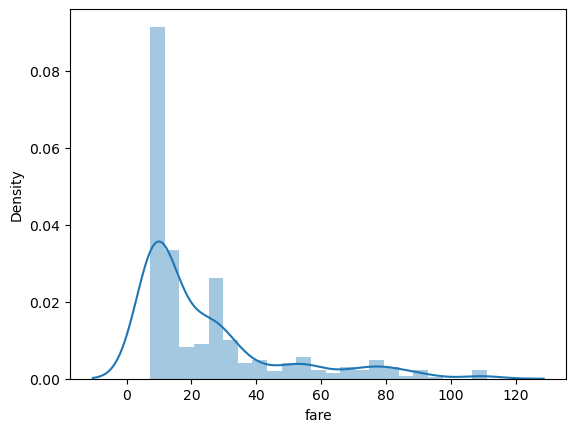

In [17]:
import seaborn as sns

sns.distplot(df.fare);

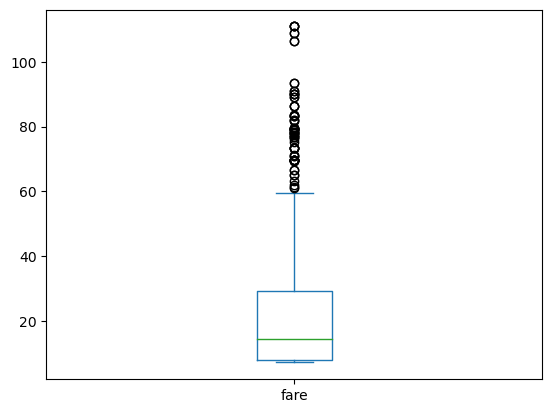

In [18]:
df.fare.plot.box();

In [19]:
df.sample(3)

,age,class,embark_town,fare
339,45.0,First,Southampton,35.500
139,24.0,First,Cherbourg,79.200
246,25.0,Third,Southampton,7.775


In [20]:
df.groupby('class').fare.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,163.0,55.054320,25.014425,25.5875,30.2500,52.0000,77.9583,110.8833
Second,178.0,21.358661,13.083169,10.5000,13.0000,15.0229,26.0000,73.5000
Third,460.0,14.198178,11.974397,7.2250,7.7958,8.0500,15.8500,69.5500


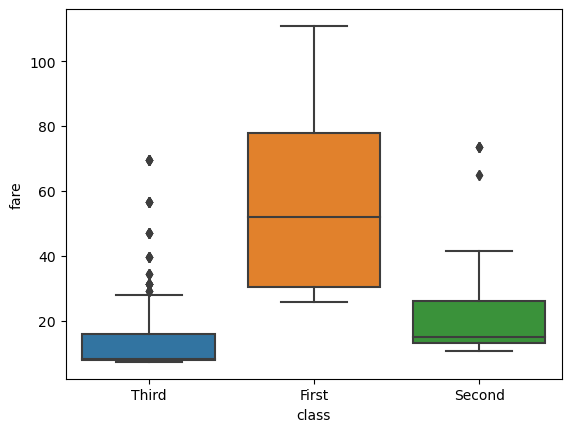

In [21]:
sns.boxplot(data=df, x='class', y='fare');

In [22]:
df.groupby('embark_town').fare.describe()

,count,mean,std,min,25%,50%,75%,max
embark_town,,,,,,,,
Cherbourg,145.0,35.933337,31.028829,7.2250,11.2417,24.00,57.9792,110.8833
Queenstown,73.0,13.629397,14.492983,7.6292,7.7500,7.75,15.5000,90.0000
Southampton,583.0,22.472689,19.286351,7.2500,8.0500,13.00,26.5500,93.5000


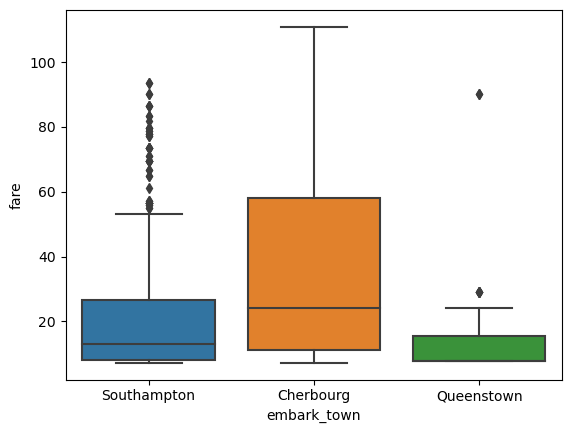

In [23]:
sns.boxplot(data=df, x='embark_town', y='fare');

In [24]:
df.groupby(['embark_town', 'class']).fare.describe().sort_values('mean')

count       mean        std      min       25%       50%  \
embark_town class                                                              
Cherbourg   Third    64.0  11.401242   4.823300   7.2250   7.22920   8.20625   
Queenstown  Third    68.0  11.439647   6.832149   7.6292   7.75000   7.75000   
            Second    3.0  12.350000   0.000000  12.3500  12.35000  12.35000   
Southampton Third   328.0  15.315812  13.522363   7.2500   7.89580   8.22915   
            Second  158.0  21.099367  13.285582  10.5000  13.00000  14.50000   
Cherbourg   Second   17.0  25.358335  11.345067  12.0000  13.86250  24.00000   
Southampton First    97.0  48.910223  21.428615  25.5875  26.55000  51.47920   
Cherbourg   First    64.0  63.274416  27.271836  26.5500  33.74065  62.66875   
Queenstown  First     2.0  90.000000   0.000000  90.0000  90.00000  90.00000   

                          75%       max  
embark_town class                        
Cherbourg   Third   14.655175   22.3583  
Queenstown  Third   15.500000   29.1250  
            Second  12.350000   12.3500  
Southampton Third   16.700000   69.5500  
            Second  26.000000   73.5000  
Cherbourg   Second  37.004200   41.5792  
Southampton First   61.175000   93.5000  
Cherbourg   First   82.170800  110.8833  
Queenstown  First   90.000000   90.0000

In [25]:
table = pd.pivot_table(df, 
                       values='fare', 
                       index=['embark_town'],
                       columns=['class'],                        
                       aggfunc="mean")
table

class,First,Second,Third
embark_town,,,
Cherbourg,63.274416,25.358335,11.401242
Queenstown,90.000000,12.350000,11.439647
Southampton,48.910223,21.099367,15.315812


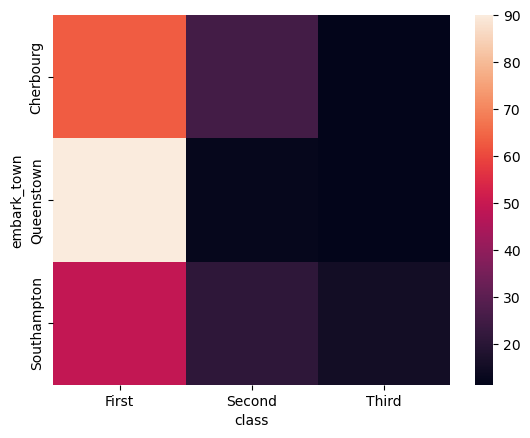

In [26]:
sns.heatmap(table);

In [27]:
df.groupby('class').age.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,163.0,38.156442,14.108543,4.00,28.000,35.0,49.0,80.0
Second,178.0,29.824888,13.805411,0.67,23.000,29.0,36.0,70.0
Third,460.0,25.646565,10.614584,0.42,20.375,28.0,28.0,74.0


In [28]:
df.corr('spearman')

/tmp/ipykernel_17904/1436705525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('spearman')


,age,fare
age,1.000000,0.139053
fare,0.139053,1.000000


In [29]:
df

,age,class,embark_town,fare
0,22.0,Third,Southampton,7.2500
1,38.0,First,Cherbourg,71.2833
2,26.0,Third,Southampton,7.9250
3,35.0,First,Southampton,53.1000
4,35.0,Third,Southampton,8.0500
...,...,...,...,...
886,27.0,Second,Southampton,13.0000
887,19.0,First,Southampton,30.0000
888,28.0,Third,Southampton,23.4500
889,26.0,First,Cherbourg,30.0000


In [30]:
df.groupby(['class', 'embark_town']).fare.describe()

count       mean        std      min       25%       50%  \
class  embark_town                                                             
First  Cherbourg     64.0  63.274416  27.271836  26.5500  33.74065  62.66875   
       Queenstown     2.0  90.000000   0.000000  90.0000  90.00000  90.00000   
       Southampton   97.0  48.910223  21.428615  25.5875  26.55000  51.47920   
Second Cherbourg     17.0  25.358335  11.345067  12.0000  13.86250  24.00000   
       Queenstown     3.0  12.350000   0.000000  12.3500  12.35000  12.35000   
       Southampton  158.0  21.099367  13.285582  10.5000  13.00000  14.50000   
Third  Cherbourg     64.0  11.401242   4.823300   7.2250   7.22920   8.20625   
       Queenstown    68.0  11.439647   6.832149   7.6292   7.75000   7.75000   
       Southampton  328.0  15.315812  13.522363   7.2500   7.89580   8.22915   

                          75%       max  
class  embark_town                       
First  Cherbourg    82.170800  110.8833  
       Queenstown   90.000000   90.0000  
       Southampton  61.175000   93.5000  
Second Cherbourg    37.004200   41.5792  
       Queenstown   12.350000   12.3500  
       Southampton  26.000000   73.5000  
Third  Cherbourg    14.655175   22.3583  
       Queenstown   15.500000   29.1250  
       Southampton  16.700000   69.5500

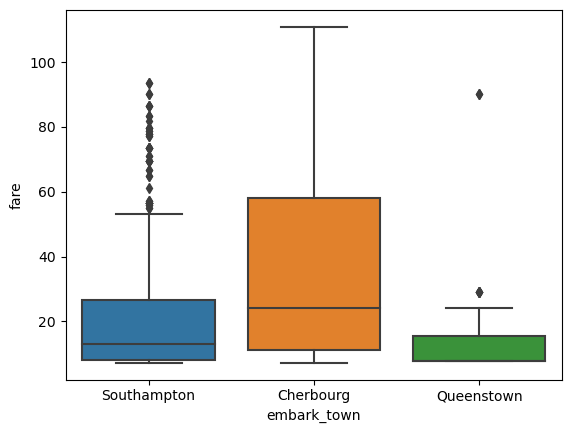

In [31]:
sns.boxplot(data=df, x='embark_town', y='fare');

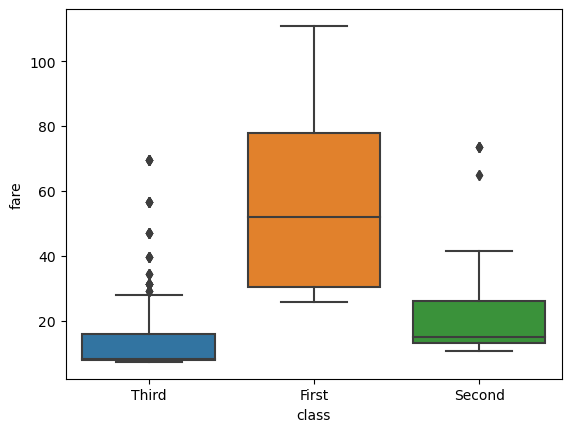

In [32]:
sns.boxplot(data=df, x='class', y='fare');

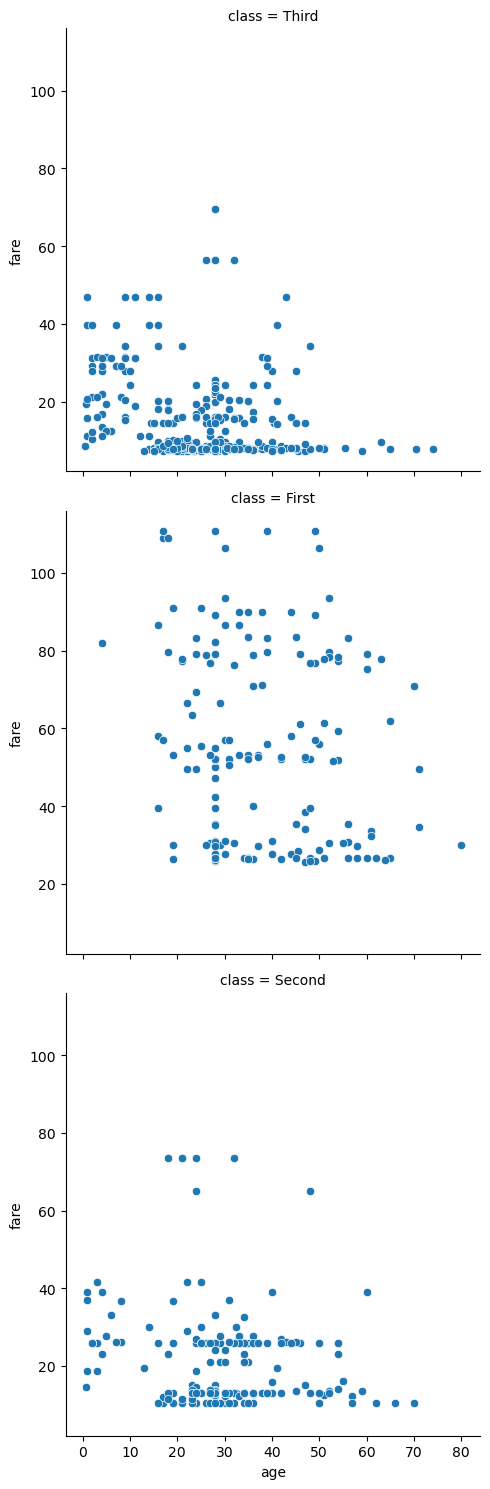

In [33]:
sns.relplot(
    data=df, 
    x="age",
    y="fare",
    row='class',
    kind="scatter"
);

# model

In [34]:
df.sample(5)

,age,class,embark_town,fare
295,28.0,First,Cherbourg,27.7208
28,28.0,Third,Queenstown,7.8792
114,17.0,Third,Cherbourg,14.4583
169,28.0,Third,Southampton,56.4958
888,28.0,Third,Southampton,23.4500


In [36]:
df['class'].value_counts()

Third     460
Second    178
First     163
Name: class, dtype: int64

In [37]:
df['embark_town'].value_counts()

Southampton    583
Cherbourg      145
Queenstown      73
Name: embark_town, dtype: int64

In [39]:
df.head()

,age,class,embark_town,fare
0,22.0,Third,Southampton,7.2500
1,38.0,First,Cherbourg,71.2833
2,26.0,Third,Southampton,7.9250
3,35.0,First,Southampton,53.1000
4,35.0,Third,Southampton,8.0500


In [42]:
pd.DataFrame({"a": ["cat_1", "cat_2", "cat_3"]})

,a
0,cat_1
1,cat_2
2,cat_3


In [41]:
pd.get_dummies(pd.DataFrame({"a": ["cat_1", "cat_2", "cat_3"]}))

,a_cat_1,a_cat_2,a_cat_3
0,1,0,0
1,0,1,0
2,0,0,1


In [44]:
!pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /home/infinitemonkeys/anaconda3/lib/python3.9/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: business-rules-and-projections, datashader, holoviews, hvplot, mlflow, mongo-queries, sbd-nlp, sbd-speechtotext, seaborn, statsmodels, xarray


In [45]:
model_df = pd.get_dummies(df, columns=['class', 'embark_town']).astype('float64')
model_df.head()

,age,fare,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [46]:
model_df.dtypes

age                        float64
fare                       float64
class_First                float64
class_Second               float64
class_Third                float64
embark_town_Cherbourg      float64
embark_town_Queenstown     float64
embark_town_Southampton    float64
dtype: object

In [48]:
MODEL_FEATURES = model_df.columns.difference(['fare']).tolist()
MODEL_FEATURES

['age',
 'class_First',
 'class_Second',
 'class_Third',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [50]:
X = model_df[MODEL_FEATURES]
y = model_df.fare

X.shape, y.shape

((801, 7), (801,))

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=X, 
          y=y)

prediction_on_train = model.predict(model_df[MODEL_FEATURES])

In [52]:
model.intercept_

37.02401178131085

In [53]:
model.coef_

array([ -0.21706583,  25.72923327,  -8.84436648, -16.88486679,
         2.48926551,  -1.86591525,  -0.62335026])

In [55]:
coeff_series = pd.Series(model.coef_, 
                         index=MODEL_FEATURES)
coeff_series = coeff_series.sort_values()
coeff_series

class_Third               -16.884867
class_Second               -8.844366
embark_town_Queenstown     -1.865915
embark_town_Southampton    -0.623350
age                        -0.217066
embark_town_Cherbourg       2.489266
class_First                25.729233
dtype: float64

In [59]:
model.intercept_

37.02401178131085

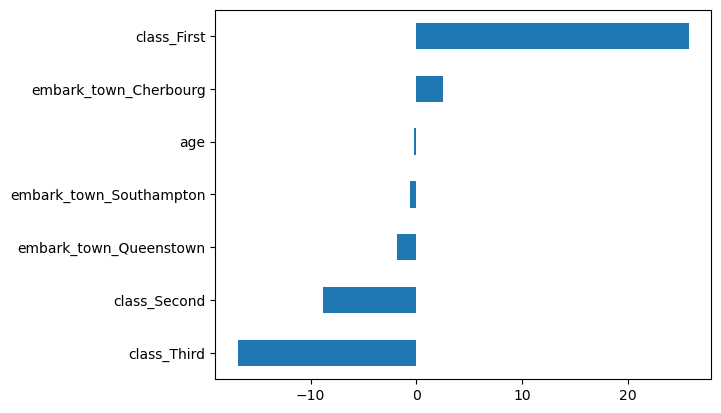

In [60]:
coeff_series.plot.barh();

In [64]:
train_error = y.values - prediction_on_train
train_error[:10]

array([-7.49034647, 14.28929098, -5.94708315, -1.43259074, -3.86849068,
       -3.7370865 ,  1.45416003,  1.99333693, -2.52171732,  2.44081081])

In [63]:
import numpy as np

mean_absolute_error = np.mean(np.abs(train_error))
mean_absolute_error

10.776105189103815

In [72]:
iqr = model_df.fare.quantile(0.75) - model_df.fare.quantile(0.25)
iqr

21.075

In [70]:
model_df.fare.quantile(0.95) - model_df.fare.quantile(0.05)

70.6458

In [67]:
model_df.fare.describe(percentiles=np.linspace(0, 1, 21))

count    801.000000
mean      24.103443
std       22.363437
min        7.225000
0%         7.225000
5%         7.312500
10%        7.750000
15%        7.800000
20%        7.895800
25%        8.050000
30%        8.050000
35%        9.500000
40%       10.516700
45%       13.000000
50%       14.454200
55%       15.900000
60%       20.575000
65%       25.929200
70%       26.287500
75%       29.125000
80%       33.000000
85%       46.900000
90%       56.929200
95%       77.958300
100%     110.883300
max      110.883300
Name: fare, dtype: float64

# reducir predictores

In [86]:
MODEL_FEATURES = ['class_First', 'class_Second', 'class_Third']

In [87]:
X = model_df[MODEL_FEATURES]
y = model_df.fare

X.shape, y.shape

((801, 3), (801,))

In [88]:
X

,class_First,class_Second,class_Third
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [97]:
df['fare_pred_on_class'] = df.groupby('class').fare.transform(lambda s: s.mean())

In [96]:
df.groupby('class').fare.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,163.0,55.054320,25.014425,25.5875,30.2500,52.0000,77.9583,110.8833
Second,178.0,21.358661,13.083169,10.5000,13.0000,15.0229,26.0000,73.5000
Third,460.0,14.198178,11.974397,7.2250,7.7958,8.0500,15.8500,69.5500


In [98]:
df.fare_pred_on_class

0      14.198178
1      55.054320
2      14.198178
3      55.054320
4      14.198178
         ...    
886    21.358661
887    55.054320
888    14.198178
889    55.054320
890    14.198178
Name: fare_pred_on_class, Length: 801, dtype: float64

In [100]:
train_error = y.values - df.fare_pred_on_class.values
train_error[:5]

array([-6.94817783, 16.22897975, -6.27317783, -1.95432025, -6.14817783])

In [101]:
import numpy as np

mean_absolute_error = np.mean(np.abs(train_error))
mean_absolute_error

11.094315304311817

- [ ] usar 3 predictores con error 10.72 donde 2 de los predictores tienen coeficientes casi nulos
- [X] usar 1 predictor con error 11.09

In [104]:
df['fare_pred_based_on_mean'] = df.fare.mean()

In [105]:
df.fare.mean()

24.10344282147316

In [106]:
df['fare_pred_on_class'] = df.groupby('class').fare.transform(lambda s: s.mean())

In [110]:
df['fare_pred_on_class_and_embark_town'] = df.groupby(['class', 'embark_town']
                                                     ).fare.transform(lambda s: s.mean())

In [117]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df.fare, df.fare_pred_based_on_mean)

16.572058346230758

In [118]:
mean_absolute_error(df.fare, df.fare_pred_on_class)

11.094315304311817

In [119]:
mean_absolute_error(df.fare, df.fare_pred_on_class_and_embark_town)

10.806533842745747

In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=X, 
          y=y)

prediction_on_train = model.predict(model_df[MODEL_FEATURES])

In [94]:
coeff_series = pd.Series(model.coef_, 
                         index=MODEL_FEATURES)
coeff_series = coeff_series.sort_values()
coeff_series

class_Third     1.816500e+15
class_Second    1.816500e+15
class_First     1.816500e+15
dtype: float64

In [91]:
model.coef_, model.intercept_

(array([1.8164999e+15, 1.8164999e+15, 1.8164999e+15]), -1816499895253194.5)

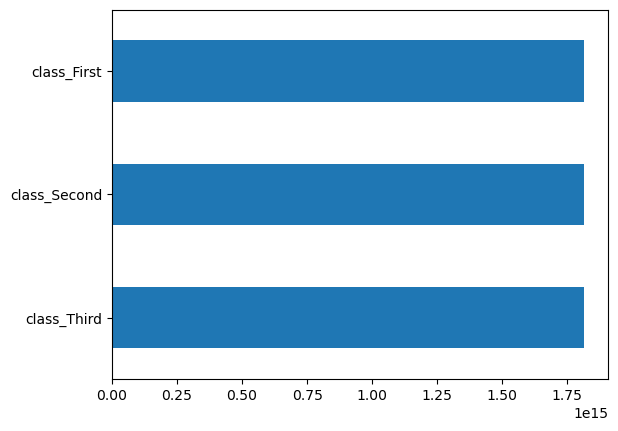

In [92]:
coeff_series.plot.barh();